<a href="https://colab.research.google.com/github/omeryar/AdminMachine/blob/master/mika%20or%20alma/lesson_1_mika_or_alma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1 - Mika or Alma

## Setup

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

In [0]:
path = Path(base_dir + 'data/mika or alma/'); path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma')

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/alma'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/mika'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/models')]

In [0]:
fnames = [];
for x in path.iterdir():
  if x.is_dir():
    fnames.extend(get_image_files(x));
len(fnames)

303

In [0]:
fnames[:5]

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/alma/IMG_7573.jpeg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/alma/IMG_2165.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/alma/IMG_0982.jpeg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/alma/IMG_0799.jpeg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/alma/IMG_2164.jpg')]

In [0]:
fnames[-5:]

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/mika/IMG_1033.jpeg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/mika/IMG_1112.jpeg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/mika/IMG_2061.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/mika/IMG_5675.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/mika or alma/mika/IMG_7770.jpeg')]

In [0]:
np.random.seed(2)
# np.random.seed(42)
pat = r"/.+/mika or alma/(.+)/.+\.jpe?g$"

In [0]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

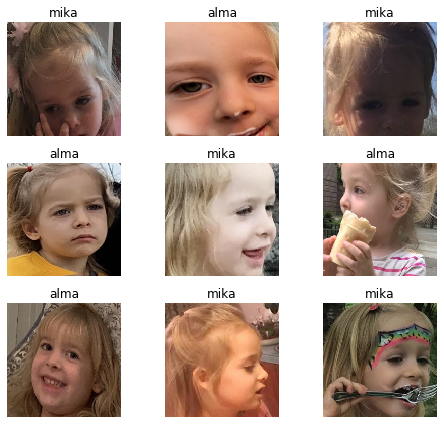

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['alma', 'mika']


(2, 2)

## Stage 1

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
# learn.model

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.118771,0.549322,0.083333,00:08
1,0.064345,0.611720,0.100000,00:09
2,0.055767,0.592127,0.116667,00:08
3,0.047082,0.581537,0.116667,00:08


In [0]:
learn.save('stage-1')

## Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

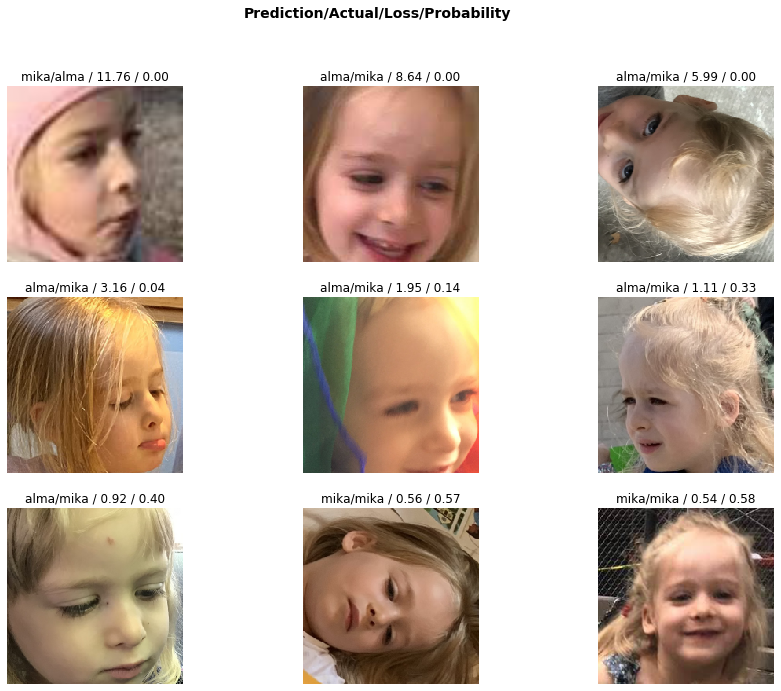

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

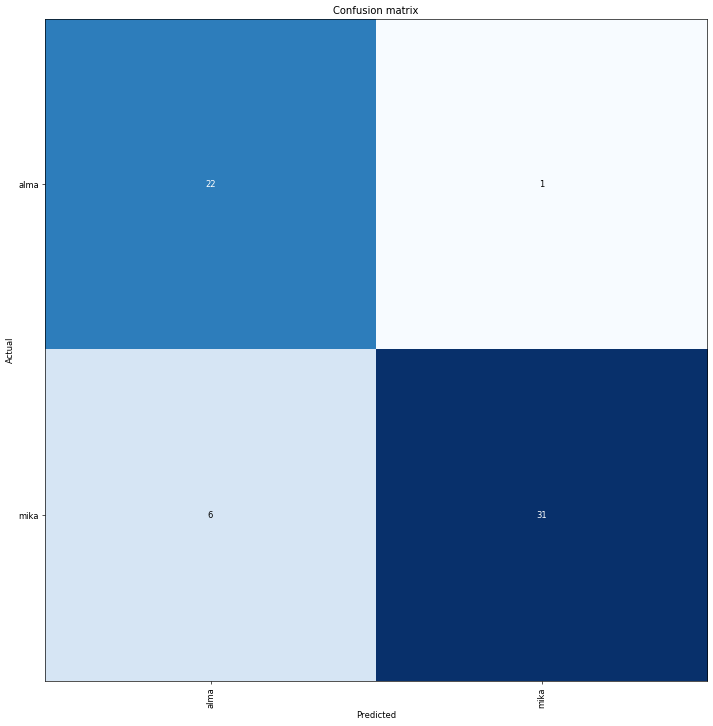

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('mika', 'alma', 3)]

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.128768,0.214416,0.066667,00:07


In [0]:
learn.load('stage-2');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


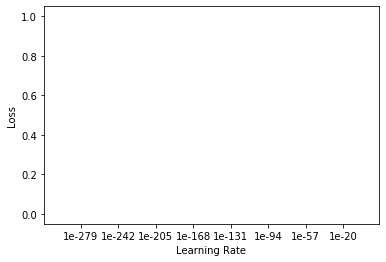

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
# learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-3,5e-1))
# learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.157429,237179424.000000,0.616667,00:30
1,24.470976,7292883968.000000,0.616667,00:08
2,27.796892,267171.312500,0.383333,00:08
3,28.677523,5102.594727,0.383333,00:08


## Stage 2

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 257MB/s]


In [0]:
learn.load('stage-2');

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.174303,0.011063,0.000000,01:47


In [0]:
# export for use in production
# learn.export()

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


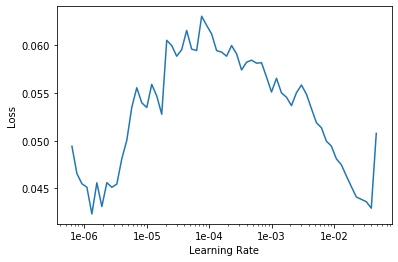

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(5e-4,5e-1))

epoch,train_loss,valid_loss,error_rate,time
0,5.128498,0.101825,0.016667,00:08
1,4.838685,40.206867,0.150000,00:08
2,4.488272,33.797153,0.116667,00:08
3,3.692708,19.144278,0.083333,00:08


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

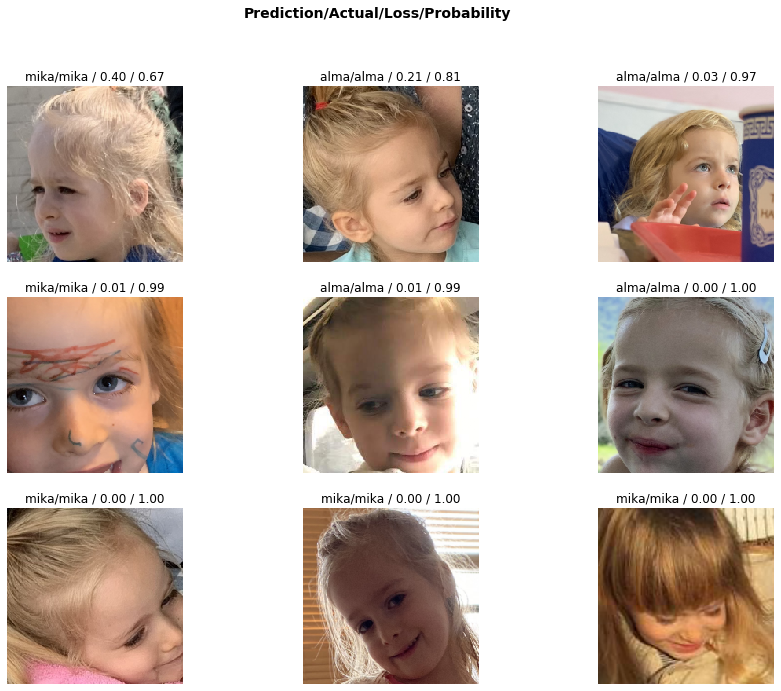

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

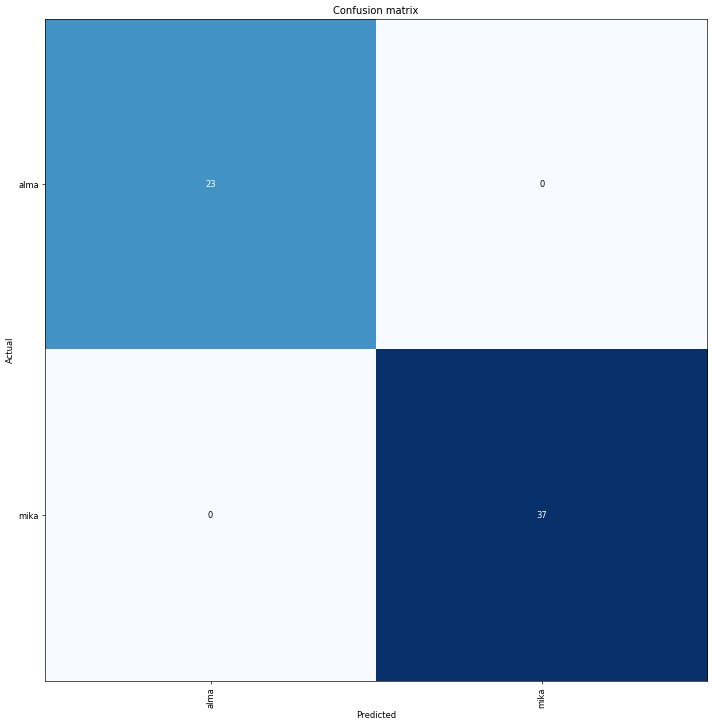

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('mika', 'alma', 5), ('alma', 'mika', 2)]

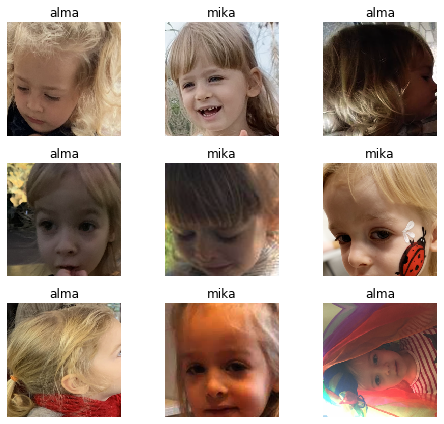

In [0]:
#show off
data.show_batch(rows=3, figsize=(7, 6))

In [0]:
imgntstats??

Object `imgntstats` not found.


## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [0]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//16).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 298MB/s]


In [0]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: ignored

In [0]:
learn.fit_one_cycle(8)

Total time: 06:59
epoch  train_loss  valid_loss  error_rate
1      0.548006    0.268912    0.076455    (00:57)
2      0.365533    0.193667    0.064953    (00:51)
3      0.336032    0.211020    0.073072    (00:51)
4      0.263173    0.212025    0.060893    (00:51)
5      0.217016    0.183195    0.063599    (00:51)
6      0.161002    0.167274    0.048038    (00:51)
7      0.086668    0.143490    0.044655    (00:51)
8      0.082288    0.154927    0.046008    (00:51)



In [0]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

Total time: 03:27
epoch  train_loss  valid_loss  error_rate
1      0.097319    0.155017    0.048038    (01:10)
2      0.074885    0.144853    0.044655    (01:08)
3      0.063509    0.144917    0.043978    (01:08)



If it doesn't, you can always go back to your previous model.

In [0]:
learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Bengal', 'Abyssinian', 4),
 ('boxer', 'american_bulldog', 4),
 ('Ragdoll', 'Birman', 4),
 ('Egyptian_Mau', 'Bengal', 3)]